# Lesson 4 Assignment - Automobile Price Hypothesis Testing
## Author - Natalie Moore

### Instructions
Test hypotheses for the price of automobiles:

*1. Compare and test the normality of the distributions of **price** and **log price**. <br/>
Use both a graphical method and a formal test. Hint: remember these relationships will always be approximate.*

- Figure 1 is the CDF plot of both the 'price' and 'log price' columns. Since they both have massively different scales ('price' being much larger), the 'log price' CDF is virtually verticle. Both will need to be scaled in order to truly compare their CDFs.


- Figure 2 is the CDF plot of both the 'price' and the 'log price' columns, scaled this time. It is now apparent that both CDFs are similar and from the same distribution (remember that 'log price' is just the log version of the 'price' column). Still, even with the similarities there is still deviations between both CDF curves.


- Between Figure 2 and Figure 3 are both K-S Tests for the scaled 'price' and 'log price' columns, assuming a normal distribution. As you can see, the KS-statistic and P-value are quite low for both tests. This suggests that the distance between both distributions (either 'price' or 'log price' and the normal distribution) is small, AND that there is a low chance the differences are from random sampling error. From this evidence it is clear that neither 'price' or 'log price' are perfectly modeled with the normal distribution. However, the p-value is much larger for 'log price' so I belive that distribution is closer to a normal one.


- Figure 3 is a histogram of both the scaled 'price' and 'log price' columns. Since they both have the same number of points, it's clear that the 'log price' column is just distributed differently than the 'price' column. The 'price' column also looks more skewed than 'log price'. Overlayed is the normalized distribution of the 'log price' column, which shows how the 'log price' column is a better fit for a normal distribution, as we saw from the K-S Tests above.


2. Test significance of **price (or log price)** stratified by 
a) **fuel type**, b) **aspiration**, and c) **rear vs. front wheel drive**. <br />Use both graphical methods and the formal test.

3. Apply ANOVA and Tukey's HSD test to the auto price data to compare the **price (or log price** if closer to a normal distribution) of autos stratified by **body style**.

4. Graphically explore the differences between the price conditioned by the categories of each variable. <br/>
Hint: Make sure you have enough data for each category and drop categories with insufficient data.

5. Use standard ANOVA and Tukey HSD to test the differences of these groups.


#### Note: 
Please clearly outline the results of these tests with markdown text. Be sure your discussion includes narrative for your figures and tables so it is clear to the reader the importance of each bit of evidence.

In [46]:
#importing necessary packages
import pandas as pd
import numpy as np
from numpy import matlib
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats
import statsmodels.stats.power as smsp
    
%matplotlib inline

In [14]:
#Reading in the Auto Price data
def read_auto_data(fileName = "https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/Automobile%20price%20data%20_Raw_.csv"):
    'Function to load the auto price data set from a .csv file' 

    ## Read the .csv file with the pandas read_csv method
    auto_price = pd.read_csv(fileName)
    
    ## Remove rows with missing values, accounting for missing values coded as '?'
    cols = ['price', 'bore', 'stroke', 
          'horsepower', 'peak-rpm']
    for column in cols:
        auto_price.loc[auto_price[column] == '?', column] = np.nan
    auto_price.dropna(axis = 0, inplace = True)

    ## Convert some columns to numeric values
    for column in cols:
        auto_price[column] = pd.to_numeric(auto_price[column])
        
    return auto_price
auto_price = read_auto_data()

#creating the 'log price' column for this assignment
auto_price['log price'] = np.log(auto_price['price'])

In [15]:
auto_price.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,log price
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.794872,98.896410,174.256923,65.886154,53.861538,2559.000000,127.938462,3.329385,3.250308,10.194974,103.271795,5099.487179,25.374359,30.841026,13248.015385,9.349624
std,1.230612,6.132038,12.476443,2.132484,2.396778,524.715799,41.433916,0.271866,0.314115,4.062109,37.869730,468.271381,6.401382,6.829315,8056.330093,0.508971
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,8.540519
25%,0.000000,94.500000,166.300000,64.050000,52.000000,2145.000000,98.000000,3.150000,3.110000,8.500000,70.000000,4800.000000,19.500000,25.000000,7756.500000,8.956284
50%,1.000000,97.000000,173.200000,65.400000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5100.000000,25.000000,30.000000,10245.000000,9.234545
75%,2.000000,102.400000,184.050000,66.900000,55.650000,2943.500000,145.500000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,35.000000,16509.000000,9.711661
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,10.723267


In [16]:
auto_price.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,log price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,9.510075
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,9.711116
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,9.711116
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,9.543235
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,9.767095


In [17]:
auto_price.tail()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,log price
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845,9.731809
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045,9.854560
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485,9.975110
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106,4800,26,27,22470,10.019936
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,19,25,22625,10.026811


In [18]:
print (auto_price.shape)
print (auto_price.dtypes)

(195, 27)
symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm               int64
city-mpg               int64
highway-mpg            int64
price                  int64
log price            float64
dtype: object


## 1. Compare/test the normality of the distributions of 'price' / 'log price':

Text(0.5,1,'Figure 1')

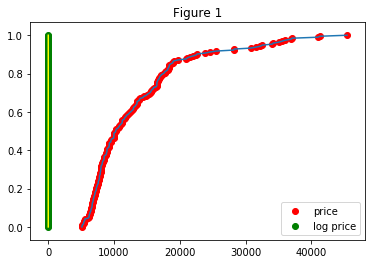

In [19]:
#Defining the function to plot the CDFs of our given distributions, 'price' and 'log price'
def plot_cums(dist1, dist2):
    ## sort the first data sample:
    data_sorted = np.sort(dist1)
    # calculate the proportional values of samples
    p = 1. * np.arange(len(dist1)) / (len(dist1) - 1)

    # Now plot as line and scatter plot. 
    plt.plot(data_sorted, p)
    plt.scatter(data_sorted, p, color = 'red', label='price')
    
    # sort the seond data sample:
    data_sorted = np.sort(dist2)
    
    # And the second plot
    plt.plot(data_sorted, p, color = 'yellow')
    plt.scatter(data_sorted, p, color = 'green', label='log price')
    
    plt.legend()

plot_cums(auto_price['price'], auto_price['log price']) 
plt.title('Figure 1')

Above is the CDF plot of both the 'price' and 'log price' columns. Since they both have massively different scales ('price' being much larger), the 'log price' CDF is virtually verticle. Both will need to be scaled in order to truly compare their CDFs.

C:\Users\natal\AnacondaNEW\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


Text(0.5,1,'Figure 2')

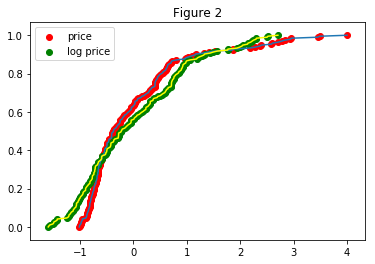

In [20]:
from sklearn.preprocessing import scale
price_s = scale(auto_price['price'])
logprice_s = scale(auto_price['log price'])
plot_cums(price_s, logprice_s)  
plt.title('Figure 2')

Above is the CDF plot of both the 'price' and the 'log price' columns, scaled this time. It is now apparent that both CDFs are similar and from the same distribution (remember that 'log price' is just the log version of the 'price' column). Still, even with the similarities there is still deviations between both CDF curves.

In [21]:
#Defining the function to perform the K-S Test for a normal distribution
def ks_test(dat, dist = 'norm'):
    from scipy.stats import kstest 
    ks_statisic, pvalue = kstest(dat, dist)
    print('KS-statistic = ' + str(ks_statisic))
    print('P-value = ' + str(pvalue))    

In [22]:
#Performing the K-S Test on our scaled 'log price' column
ks_test(logprice_s)

KS-statistic = 0.10295537216792472
P-value = 0.029757993611015943


In [23]:
#Performing the K-S Test on our scaled 'price' column
ks_test(price_s)

KS-statistic = 0.15672300254932997
P-value = 0.00011937821625407352


Above are both K-S Tests for the scaled 'price' and 'log price' columns, assuming a normal distribution. As you can see, the KS-statistic and P-value are quite low for both tests. This suggests that the distance between both distributions (either 'price' or 'log price' and the normal distribution) is small, AND that there is a low chance the differences are from random sampling error. From this evidence it is clear that neither 'price' or 'log price' are perfectly modeled with the normal distribution. However, the p-value is much larger for 'log price' so I belive that distribution is closer to a normal one.

C:\Users\natal\AnacondaNEW\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\natal\AnacondaNEW\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Figure 3')

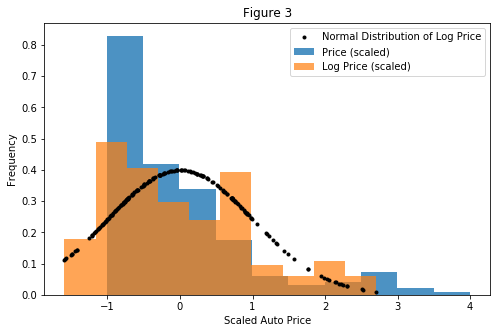

In [24]:
#creating the fit for a normal distribution based on log price
fit_ls = stats.norm.pdf(logprice_s, np.mean(logprice_s), np.std(logprice_s))

#Plotting Figure 1
plt.figure(figsize=(8,5))

plt.hist(price_s,normed=True,alpha=.8,label='Price (scaled)')
plt.hist(logprice_s,normed=True,alpha=.7,label='Log Price (scaled)')
plt.plot(logprice_s,fit_ls,'.',color='black',label='Normal Distribution of Log Price')

plt.legend()
plt.xlabel('Scaled Auto Price')
plt.ylabel('Frequency')
plt.title('Figure 3')

Above is a histogram of both the scaled 'price' and 'log price' columns. Since they both have the same number of points, it's clear that the 'log price' column is just distributed differently than the 'price' column. The 'price' column also looks more skewed than 'log price'. Overlayed is the normalized distribution of the 'log price' column, which shows how the 'log price' column is a better fit for a normal distribution, as we saw from the K-S Tests above.

## 2. Test significance of **log price** stratified by:
### a) **fuel type**

In [43]:
#defining the function to stratify my auto_price data by different groups
def stratify(dat, p):
    groups = dat.groupby(group) # Create the groups
    nums = min(groups.size()) # Find the size of the smallest group
    num = int(p * dat.shape[0]) # Compute the desired number of samples per group
    if num <= nums: # If sufficient group size, sample each group and return. 
        return groups.apply(lambda x: x.sample(n=num))
    else: # Oops. p is to large
        pmax = nums / dat.shape[0]
        print('The maximum value of p = ' + str(pmax))

In [44]:
p = .1 #found from trial and error
group = 'fuel-type'

strat_fueltype = stratify(auto_price, p)
strat_fueltype = pd.DataFrame(strat_fueltype.loc[:,'log price'])
strat_fueltype

log price
fuel-type               
diesel    67   10.148471
          184   8.986572
          112   9.735069
          69   10.246226
          203  10.019936
          68   10.248778
          174   9.277812
          63    9.286838
          158   8.974365
          110   9.536762
          187   9.158521
          108   9.487972
          159   8.960339
          182   8.958669
          90    8.867709
          116   9.795345
          70   10.360912
          114   9.745371
          192   9.535679
gas       151   8.754319
          91    8.802222
          10    9.706864
          176   9.296335
          143   9.206332
          185   9.011279
          89    8.612322
          137   9.831992
          156   8.844769
          113   9.722865
          141   8.871505
          13    9.957265
          200   9.731809
          127  10.434939
          32    8.593969
          28    9.096163
          118   8.625509
          23    8.981807
          107   9.384294

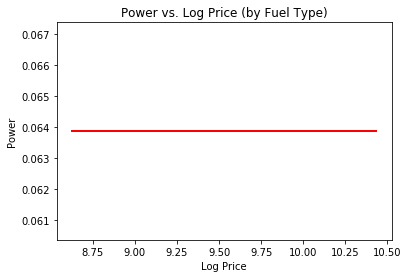

In [57]:
fueltype = strat_fueltype.loc[:,'log price']
effect_size = strat_fueltype.loc[:,'log price'].mean
powers = [smsp.tt_ind_solve_power(effect_size = .1, nobs1 = 25, 
           alpha = 0.05, power = None, ratio = 1.0, alternative = 'two-sided') 
          for x in diffs]

def plot_power(x, y, xlabel, title):
    plt.plot(x, y, color = 'red', linewidth = 2)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Power')
plot_power(fueltype, powers, xlabel = 'Log Price', title = 'Power vs. Log Price (by Fuel Type)')    

In [60]:
np.mean(strat_fueltype.loc['log price'])

KeyError: 'the label [log price] is not in the [index]'

### b) **aspiration**

In [47]:
p = .18 #found from trial and error
group = 'aspiration'

strat_aspiration = stratify(auto_price, p)
strat_aspiration = pd.DataFrame(strat_aspiration.loc[:,'log price'])
strat_aspiration

log price
aspiration               
std        28    9.096163
           160   8.953899
           54    8.908559
           142   8.958669
           106   9.820052
           40    9.239414
           200   9.731809
           107   9.384294
           170   9.323580
           134   9.618469
           168   9.173573
           6     9.781885
           175   9.209140
           42    9.244259
           89    8.612322
           32    8.593969
           111   9.653743
           173   9.099185
           180   9.660779
           146   8.917713
           154   8.974365
           71   10.439513
           135   9.649240
           186   9.047233
           194   9.468079
           41    9.468465
           14   10.109078
           184   8.986572
           161   9.030974
           12    9.950848
...                   ...
turbo      110   9.536762
           70   10.360912
           204  10.026811
           67   10.148471
           105   9.888323
           192   9.535679
           137   9.831992
           29    9.469932
           119   8.981807
           114   9.745371
           82    9.443751
           199   9.849559
           203  10.019936
           87    9.135509
           116   9.795345
           80    9.206232
           69   10.246226
           201   9.854560
           187   9.158521
           23    8.981807
           198   9.821192
           83    9.607034
           27    9.054622
           174   9.277812
           112   9.735069
           84    9.581145
           145   9.328923
           8    10.080587
           79    8.947546
           149   9.366831

[70 rows x 1 columns]

### c) **rear vs. front wheel drive**

In [48]:
p = .04 #found from trial and error
group = 'drive-wheels'

strat_drivewheels = stratify(auto_price, p)
strat_drivewheels = pd.DataFrame(strat_drivewheels.loc[:,'log price'])
strat_drivewheels

log price
drive-wheels               
4wd          140   8.936298
             145   9.328923
             4     9.767095
             154   8.974365
             149   9.366831
             148   8.988821
             155   9.080004
fwd          183   8.984067
             94    8.895493
             92    8.831858
             34    8.871926
             189   9.358329
             177   9.327946
             95    8.961751
rwd          170   9.323580
             75    9.711297
             14   10.109078
             110   9.536762
             12    9.950848
             71   10.439513
             107   9.384294

## 3. Apply ANOVA and Tukey's HSD test to the auto price data to compare the **log price** of autos stratified by **body style**:

In [62]:
p = .03 #found from trial and error
group = 'body-style'

strat_bodystyle = stratify(auto_price, p)
strat_bodystyle = pd.DataFrame(strat_bodystyle.loc[:,'log price'])
strat_bodystyle

log price
body-style                
convertible 0     9.510075
            172   9.779567
            72   10.464702
            1     9.711116
            189   9.358329
hardtop     126  10.389857
            98    9.017847
            168   9.173573
            167   9.041803
            69   10.246226
hatchback   37    8.973985
            34    8.871926
            169   9.209240
            50    8.555452
            136   9.806426
sedan       191   9.495143
            43    8.822470
            66    9.817058
            25    8.808668
            173   9.099185
wagon       109   9.428672
            148   8.988821
            149   9.366831
            154   8.974365
            193   9.416541

ValueError: cannot copy sequence with size 5 to array axis with dimension 1

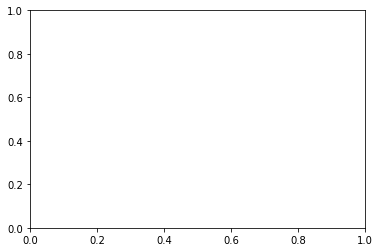

In [66]:
plt.boxplot([strat_bodystyle.loc['convertible',:], strat_bodystyle.loc['hardtop',:], strat_bodystyle.loc['hatchback',:], strat_bodystyle.loc['sedan',:], strat_bodystyle.loc['wagon',:]])
plt.ylabel('Log Price')
plt.xlabel('Body Style')